# NoteBook adadjust

## Utilisation de curve_fit sans barre d'erreur

Il faut définir x et y qui doivent être de même taille :  
- x = np.linspace(1, 8, nsamples)   
- y = np.array([-12.3675, 410.85, 1575.4774999999997, 3849.57, 7601.182500000001, 13198.369999999999, 21009.1875, 31401.69])

Définir la fonction à fit : Correspond ici à *def f(x, a, b, c, d)*

Utiliser ensuite curve fit qui nous renverra les valeurs a, b, c, d

Et enfin plot le résultat

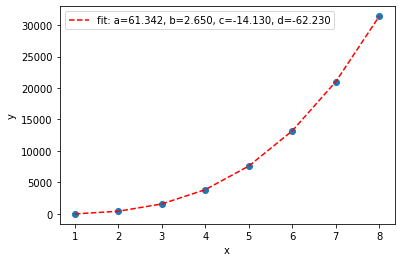

In [68]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

nsamples = 8
x = np.linspace(1, 8, nsamples) # Cordonnée en 'x'
y = np.array([-12.3675, 410.85, 1575.4774999999997, 3849.57, 7601.182500000001, 13198.369999999999, 21009.1875, 31401.69]) # Cordonnée en 'y'

def f(x, a, b,c, d): # Fonction a fit
    return a * x ** 3 + b * x**2 + c*x + d

xdata = x
ydata = y

popt, pcov = curve_fit(f, xdata, ydata) # popt sera égale au valeur de a, b, c, d
plt.scatter(xdata, ydata)
plt.plot(xdata, f(xdata, *popt), 'r--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt)) # les valeur de x seront x, les valeurs de y seront f(x, *popt)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Utilisation de curve_fit avec barre d'erreur

Il faudra faire la même choses qu'au dessus mais rajouter un np array correspondant au erreur sur y de la même taille que *y*. 

De plus dans curve fit il faut rajouter la paramettre sigma qui correspond a nos erreur sur *y*

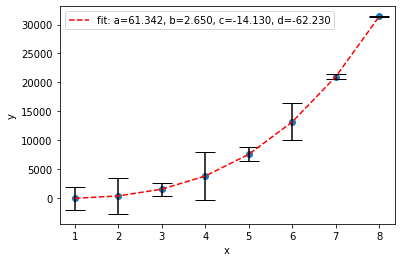

In [71]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

nsamples = 8
x = np.linspace(1, 8, nsamples)
y = np.array([-12.3675, 410.85, 1575.4774999999997, 3849.57, 7601.182500000001, 13198.369999999999, 21009.1875, 31401.69])
yErrorValues = np.array([2000,3110,1120,4130,1230,3210,400,30]) # Correspond au 
def f(x, a, b,c, d):
    return a * x ** 3 + b * x**2 + c*x + d


xdata = x
ydata = y
sigma = yErrorValues
popt, pcov = curve_fit(f, xdata, ydata, sigma=sigma) # Sigma correspond aux erreur sur y

plt.scatter(xdata, ydata)
plt.errorbar(x, y, yerr = yErrorValues,
  fmt = 'none', capsize = 10, ecolor = 'black', zorder = 1)
plt.plot(xdata, f(xdata, *popt), 'r--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Utilisation de curve_fit sur des fonction discontinue

C'est la même chose que dans la celulle "Utilisation de curve_fit sans barre d'erreur" il faudra cependant faire attention a bien définir notre fonction

D'après les résultat nous pouvons voir que curve_fit ne marche pas sur des fonction non continue


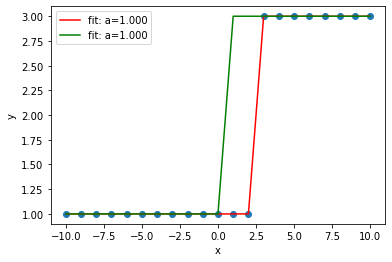

In [72]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x2 = np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ])

def f_discontinue(x, a):
    l = []
    if x<a:
        return(1)
    else:
        return(3)            
y2 = np.array([f_discontinue(xi, 3) for xi in x2]) # y avec la valeur de a optimal qui vaut 3

def f_discontinue2(x, a):
    l = []
    for i in x:
        if i<a:
            return(1)
        else:
            return(3)
        
xdata2 = x2
ydata2 = y2
popt2, pcov2 = curve_fit(f_discontinue2, xdata2, ydata2)
y_pred = np.array([f_discontinue(xi, popt2) for xi in x2]) # y avec la valeur de a qui vaut la valeur prédit par curve_fit

plt.scatter(xdata2, ydata2)


plt.plot(xdata2, ydata2, 'r-',label='fit: a=%5.3f' % tuple(popt2))
plt.plot( xdata2, y_pred, 'g-',label='fit: a=%5.3f' % tuple(popt2))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()